# Many Endings with different Image creation values

## Step 1.1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as SIMR
gm = SIMR.gm
im = SIMR.im
SIM = SIMR.SIM
IMG = SIMR.IMG
ms = SIMR.ms
sa = SIMR.sa
dc = SIMR.ms.dc

SIMR.test()
gm.test()
SIM.test()
IMG.test()
ms.test()
dc.test()
sa.test()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-prpeo4gp because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
SIM: Hi!  You're in Matthew's main code for all things simulation.
IMG: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 1.2
### Load Sample Target and Run Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir/'
#tDir = '../dataDir/588013383816904792/'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")
    
# Get run info class
rInfo = tInfo.getRunInfo( )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'run_0000' Good!


___
## Step 2
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

In [3]:
if True: 
    # Change image name if you want to grab a different image parameter
    old_name = 'dl-s2-0'
    old_params = tInfo.getImageParams(  )
    old_param = old_params[old_name]

    # This image parameter should have the correct size and pixel centers
    gm.pprint( old_param )

    # Grab mySet form param
    mySet = gm.readJson( '../param/mySet.json')
    # gm.pprint( mySet )

{'cmpArg': {'direct_compare_function': 'absolute_difference',
            'targetName': 'dl-s2-0',
            'targetType': 'target_image',
            'type': 'direct_image_comparison'},
 'comment': 'Default Parameters '
            'Deep-Learning Experiment '
            '2.',
 'imgArg': {'blur': {'size': 13,
                     'type': 'gaussian_blur',
                     'weight': 0.75},
            'comment': 'Image for Deep '
                       'Learning '
                       'Experiment 2.',
            'galaxy_centers': {'px': 85,
                               'py': 54,
                               'sx': 42,
                               'sy': 74},
            'image_size': {'height': 128,
                           'width': 128},
            'name': 'dl-s2-0',
            'normalization': {'norm_constant': 2.5,
                              'type': 'type1'},
            'radial_const': [1, 1]},
 'name': 'dl-s2-0',
 'scoreType': 'model_fitness_score',
 'simArg': {

___
## Step 2.1
### Create Base Score Parameters to modify

587722984435351614
SIMR.run_new_score: 
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.run_new_score: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fa48a207d90>
	 - runID: run_0000
IMG: image_creator_run
	 - printAll
IMG: given parameters: 1
IMG:  dl-s2-1-base
IMG: create_basic_run_image:
	 - runId: run_0000
	 - score: dl-s2-1-base
IMG: Image 'dl-s2-1-base' already made for run_0000
IMG: getBasicRunParticles: 
	 - simArg: <class 'dict'>
	 - Creating image from points
	 - Saving model image at: /home/mbo2d/galStuff/data-dir/587722984435351614/zoo_merger_models/run_0000/model_images/dl-s2-1-base_model.png
	 - Saving unperturbed at: /home/mbo2d/galStuff/data-dir/587722984435351614/zoo_merger_models/run_0000/misc_images/dl-s2-1-base_init.png
IMG_LOOP:    1 /    1: COMPLETE
IM.run_info_class.getModelImage:
	 - img name: dl-s2-1-base
	 - img type: model


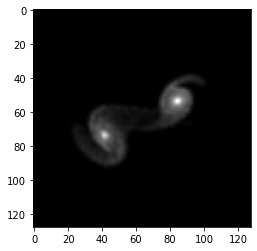

In [4]:
tid = tInfo.get('target_id')
print( tid )

if True: 
    c = 0
    bName = 'dl-s2-1-base' 
    baseParam = { bName : gm.deepcopy( tInfo.get('score_parameters')['dl-s2-0']) }
    baseParam[bName]['name'] = bName
    # baseParam[bName]['simArg']['type'] = 'many_endings'
    # baseParam[bName]['imgArg']['type'] = 'many_endings'
    baseParam[bName]['simArg']['nPts'] = '4k'
    baseParam[bName]['simArg']['name'] = '4k'
    # baseParam[bName]['simArg']['name'] = '4k-many-endings'
    baseParam[bName]['imgArg']['name'] = bName
    baseParam[bName]['imgArg']['radial_const'] = [1.0, 1.0]
    baseParam[bName]['imgArg']['blur']['size'] = 25
    baseParam[bName]['imgArg']['blur']['weight'] = 1
    baseParam[bName]['imgArg']['normalization']['type'] = 'type1'
    baseParam[bName]['imgArg']['normalization']['norm_constant'] = 1.5
    baseParam[bName]['imgArg']['radial_constant'] = -1


    cmdArgs = gm.inArgClass()
    cmdArgs.setArg( 'scoreParams', baseParam )
    cmdArgs.setArg( 'runInfo', rInfo )
    # cmdArgs.setArg( 'newSim', True )
    # cmdArgs.setArg( 'zipSim', True )
    cmdArgs.setArg( 'newImage', True )
    cmdArgs.setArg( 'overWrite', True )
    cmdArgs.setArg( 'printAll', True )

    SIMR.run_new_score( cmdArgs, rInfo )

    rInfo.printAll = True
    newImg = rInfo.getModelImage( bName )
    plt.imshow( newImg, cmap='gray' )



## 2.2 Create different Image Parameters for base model and init image

In [5]:
# Image Parameter values and ranges for np.linspace
mySet[tid]['blur-weight-range'] = [ 0.7, 1.8, 3 ]
mySet[tid]['norm-types'] = [ 'type1' ]
mySet[tid]['norm-range'] = [ 1.5, 2.5, 3 ]
mySet[tid]['radial-range'] = [ -1.5, 1, 3 ]


rBlur = mySet[tid]['blur-weight-range']
rNorm = mySet[tid]['norm-range']
rRadial = mySet[tid]['radial-range']

# Create Base Model and Initial Parameters

newParams = {}
c = 0
for w in np.linspace( rBlur[0], rBlur[1], rBlur[2] ):
    for n in np.linspace( rNorm[0], rNorm[1], rNorm[2] ):
        for r1 in np.linspace( rRadial[0], rRadial[1], rRadial[2] ):
            tempName = 'dl-s2-1-base-%d' % c
            newParams[tempName] = gm.deepcopy( baseParam[bName] )
            newParams[tempName]['name'] = tempName
            newParams[tempName]['imgArg']['name'] = tempName
            imgArg = newParams[tempName]['imgArg']
            imgArg['blur']['weight'] = w
            imgArg['normalization']['norm_constant'] = n
            imgArg['radial_const'] = [ r1, r1 ]
            print( 'c: ', c, 'w: ', w, 'n: ', n, 'r1: ', r1,)
            c += 1

manyBase = 'dl-s2-1-many-0' 
newParams[manyBase] = gm.deepcopy( tInfo.get('score_parameters')['dl-s2-0'] )
newParams[manyBase]['name'] = manyBase
newParams[manyBase]['simArg']['type'] = 'many_endings'
newParams[manyBase]['imgArg']['type'] = 'many_endings'
newParams[manyBase]['simArg']['nPts'] = '4k'
newParams[manyBase]['simArg']['name'] = '4k-many-endings'
newParams[manyBase]['imgArg']['name'] = manyBase
newParams[manyBase]['imgArg']['blur']['size'] = 25
newParams[manyBase]['imgArg']['blur']['weight'] = mySet[tid]['blur-weight-range'][0]
newParams[manyBase]['imgArg']['normalization']['type'] = mySet[tid]['norm-types'][0]
newParams[manyBase]['imgArg']['normalization']['norm_constant'] = mySet[tid]['norm-range'][0]
newParams[manyBase]['imgArg']['radial_const'] = [ mySet[tid]['radial-range'][0], mySet[tid]['radial-range'][0]]


# Create Many Parameters
c = 0
for w in np.linspace( rBlur[0], rBlur[1], rBlur[2] ):
    for n in np.linspace( rNorm[0], rNorm[1], rNorm[2] ):
        for r1 in np.linspace( rRadial[0], rRadial[1], rRadial[2] ):
            tempName = 'dl-s2-1-many-%d'  % c
            newParams[tempName] = gm.deepcopy( newParams[manyBase] )
            newParams[tempName]['name'] = tempName
            newParams[tempName]['imgArg']['name'] = tempName
            imgArg = newParams[tempName]['imgArg']
            imgArg['blur']['weight'] = w
            imgArg['normalization']['norm_constant'] = n
            imgArg['radial_const'] = [ r1, r1 ]
            # print( 'c: ', c, 'w: ', w, 'n: ', n, 'r1: ', r1,)
            c += 1

if True:
    cmdArgs = gm.inArgClass()
    cmdArgs.setArg( 'scoreParams', newParams )
    cmdArgs.setArg( 'runInfo', rInfo )
    cmdArgs.setArg( 'newSim', True )
    cmdArgs.setArg( 'zipSim', True )
    cmdArgs.setArg( 'newImage', True )
    #cmdArgs.setArg( 'overWrite', True )
    cmdArgs.setArg( 'printAll', True )

    rInfo.printAll = True
    SIMR.run_new_score( cmdArgs, rInfo )
    
    


c:  0 w:  0.7 n:  1.5 r1:  -1.5
c:  1 w:  0.7 n:  1.5 r1:  -0.25
c:  2 w:  0.7 n:  1.5 r1:  1.0
c:  3 w:  0.7 n:  2.0 r1:  -1.5
c:  4 w:  0.7 n:  2.0 r1:  -0.25
c:  5 w:  0.7 n:  2.0 r1:  1.0
c:  6 w:  0.7 n:  2.5 r1:  -1.5
c:  7 w:  0.7 n:  2.5 r1:  -0.25
c:  8 w:  0.7 n:  2.5 r1:  1.0
c:  9 w:  1.25 n:  1.5 r1:  -1.5
c:  10 w:  1.25 n:  1.5 r1:  -0.25
c:  11 w:  1.25 n:  1.5 r1:  1.0
c:  12 w:  1.25 n:  2.0 r1:  -1.5
c:  13 w:  1.25 n:  2.0 r1:  -0.25
c:  14 w:  1.25 n:  2.0 r1:  1.0
c:  15 w:  1.25 n:  2.5 r1:  -1.5
c:  16 w:  1.25 n:  2.5 r1:  -0.25
c:  17 w:  1.25 n:  2.5 r1:  1.0
c:  18 w:  1.8 n:  1.5 r1:  -1.5
c:  19 w:  1.8 n:  1.5 r1:  -0.25
c:  20 w:  1.8 n:  1.5 r1:  1.0
c:  21 w:  1.8 n:  2.0 r1:  -1.5
c:  22 w:  1.8 n:  2.0 r1:  -0.25
c:  23 w:  1.8 n:  2.0 r1:  1.0
c:  24 w:  1.8 n:  2.5 r1:  -1.5
c:  25 w:  1.8 n:  2.5 r1:  -0.25
c:  26 w:  1.8 n:  2.5 r1:  1.0
SIMR.run_new_score: 
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.run_new_

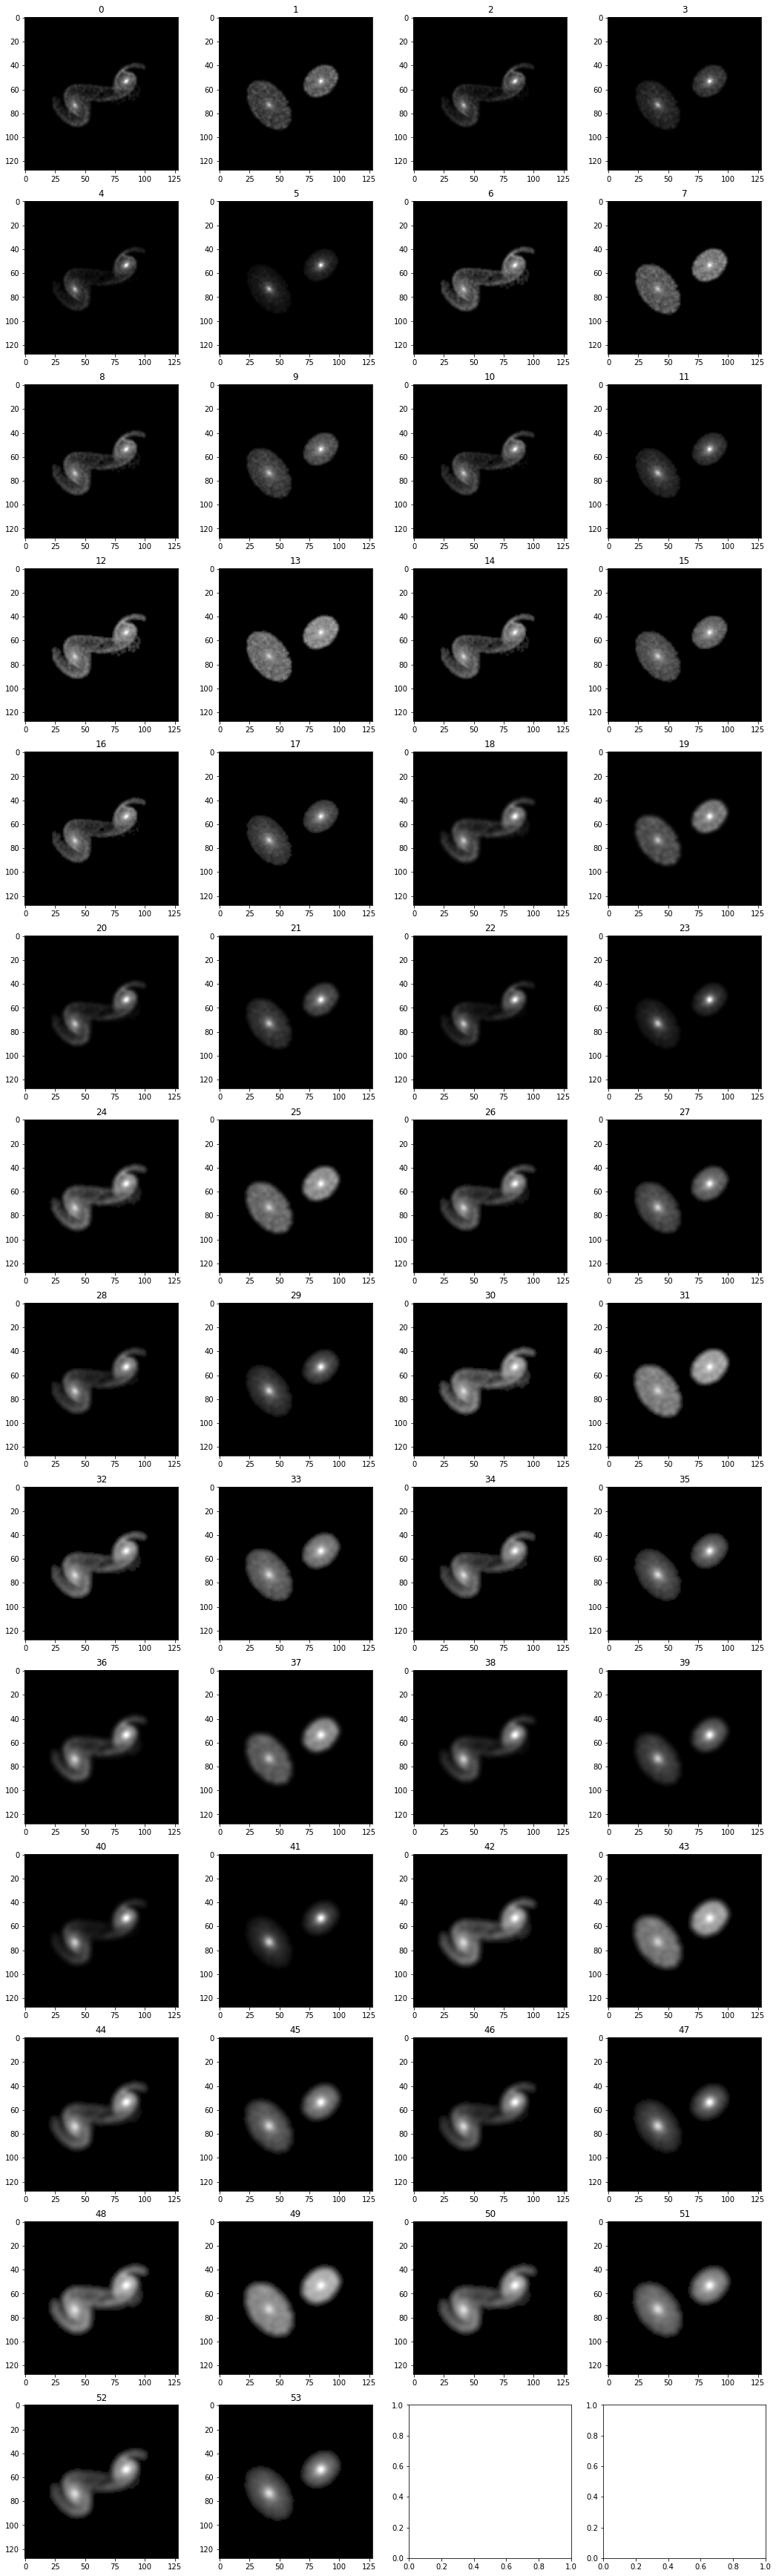

In [6]:

if True:

    # Get images
    imgList = []
    for imgName in newParams: 
        print( imgName, end='\r' )
        rInfo.printAll = False
        if 'base' in imgName:
            newImg1 = rInfo.getModelImage( imgName, imgType='model' )
            newImg2 = rInfo.getModelImage( imgName, imgType='init' )
            #print( 'baseMaxes: ', np.amax( newImg1 ), np.amax( newImg2 ) )

            imgList.append( newImg1 )
            imgList.append( newImg2 )
    gm.showImgList( imgList, size=18, col_count=4 )
    



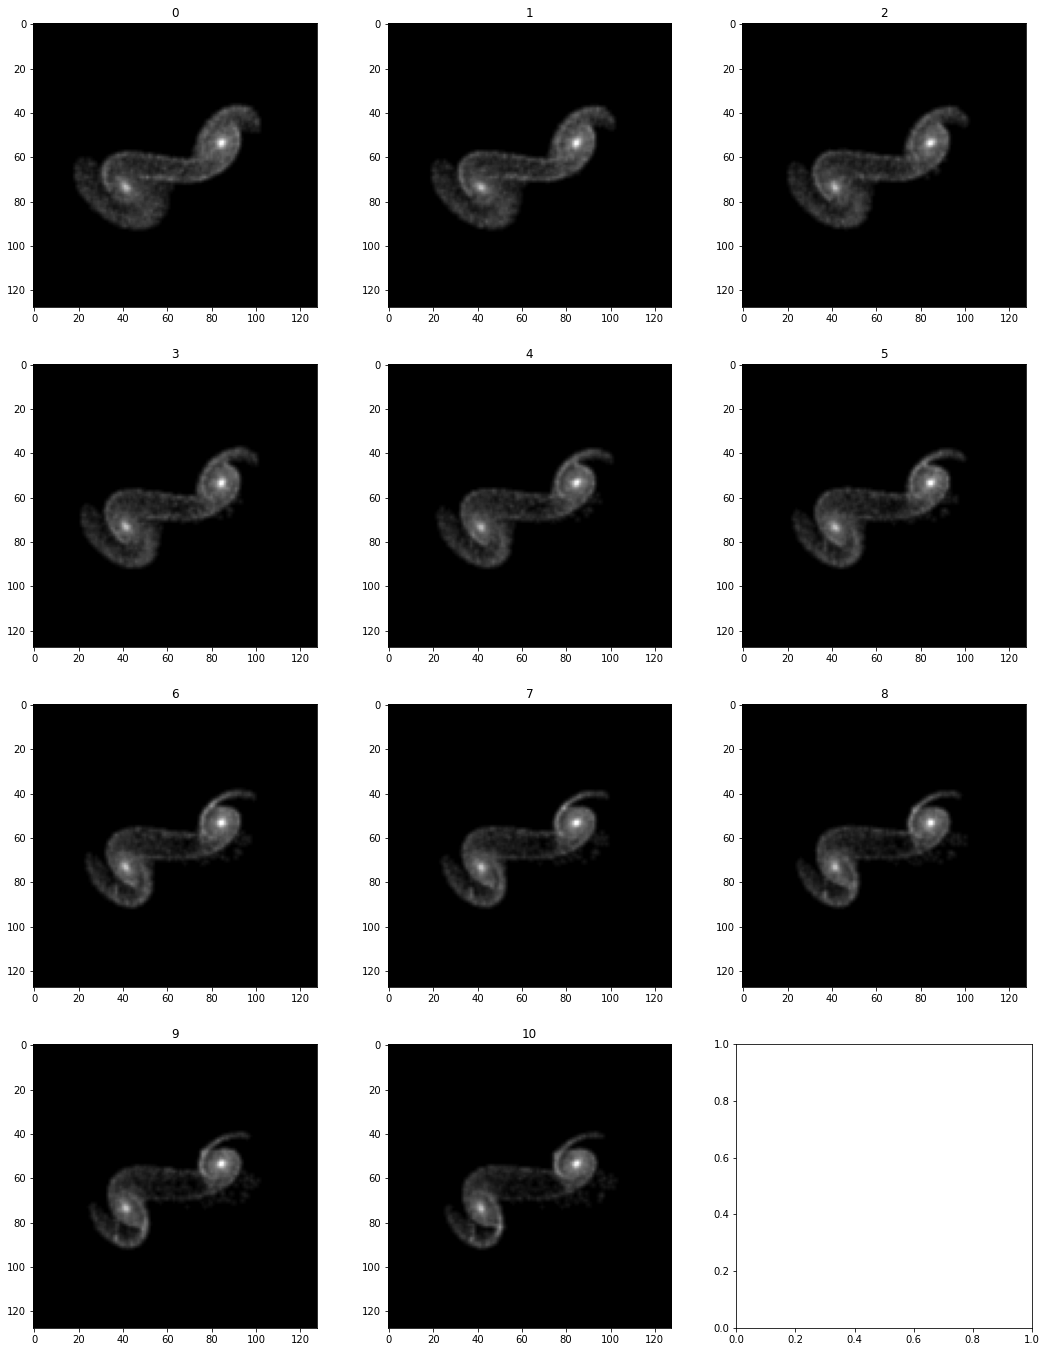

In [11]:
if True:

    # Get images
    imgList = []
    for imgName in newParams: 
        #print( imgName )
        if 'many' in imgName:
            newImgList = rInfo.getModelImage( imgName, imgType='many_endings' )
            for newImg in newImgList:
                imgList.append( newImg )
            break
            

    gm.showImgList( imgList, size=18, col_count=3 )

In [12]:

tInfo.addImageParams( newParams )
tInfo.saveScoreParam( newParams, 'dl-s2-1' )
tInfo.saveInfoFile()